In [1]:
#https://github.com/matplotlib/mplfinance/blob/master/examples/addplot.ipynb
from xlib.astock import AStock
import talib as ta
import numpy as np 
import pandas as pd
import mplfinance as mpf

In [2]:
ts_code='002624.sz'
data=AStock.getStockDailyPriceByCode(ts_code,'tushare')
data=data[data['trade_date']>'20210101']
data['trade_date'] = pd.to_datetime(data['trade_date'], format='%Y%m%d')
data=data.set_index('trade_date')   
data

,ts_code,open,high,low,close,pre_close,change,pct_chg,vol,amount,adj_factor,vwap,prev_close,returns,volume
trade_date,,,,,,,,,,,,,,,
2021-01-04,002624.SZ,29.264814,30.336567,28.897639,29.870156,29.274738,0.595418,2.0339,436019.81,1308330.482,3.119,30.006216,29.051195,2.0339,436019.81
2021-01-05,002624.SZ,29.572447,31.299160,29.473210,30.604505,29.870156,0.734349,2.4585,436085.14,1349353.659,3.119,30.942435,29.642067,2.4585,436085.14
2021-01-06,002624.SZ,30.614429,30.991527,29.552599,29.959469,30.604505,-0.645037,-2.1077,332446.42,1007364.564,3.119,30.301561,30.370809,-2.1077,332446.42
2021-01-07,002624.SZ,29.493058,29.711378,28.183137,28.798403,29.959469,-1.161066,-3.8755,430461.78,1244843.720,3.119,28.918797,29.730698,-3.8755,430461.78
2021-01-08,002624.SZ,28.480846,31.011374,28.341915,30.197636,28.798403,1.399233,4.8587,699255.72,2097166.280,3.119,29.991406,28.578498,4.8587,699255.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-14,002624.SZ,11.630000,12.140000,11.620000,11.880000,11.660000,0.220000,1.8868,327083.57,389428.651,3.143,11.906090,11.660000,1.8868,327083.57
2022-04-15,002624.SZ,12.300000,12.950000,12.150000,12.720000,11.880000,0.840000,7.0707,740746.39,931742.858,3.143,12.578432,11.880000,7.0707,740746.39
2022-04-18,002624.SZ,12.670000,12.670000,12.150000,12.310000,12.720000,-0.410000,-3.2233,417652.26,515391.637,3.143,12.340209,12.720000,-3.2233,417652.26


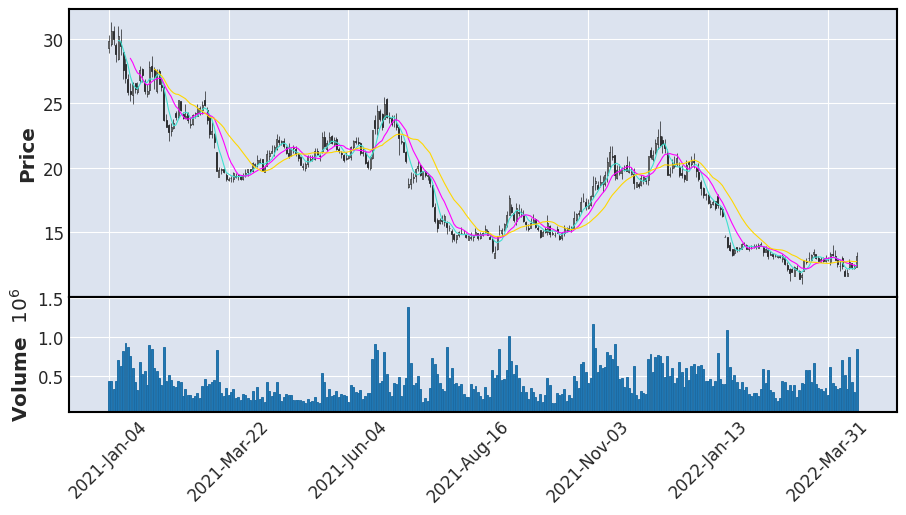

In [3]:
mpf.plot(data, type='candle',figratio=(20,10), mav=(5,10,20), volume=True, )

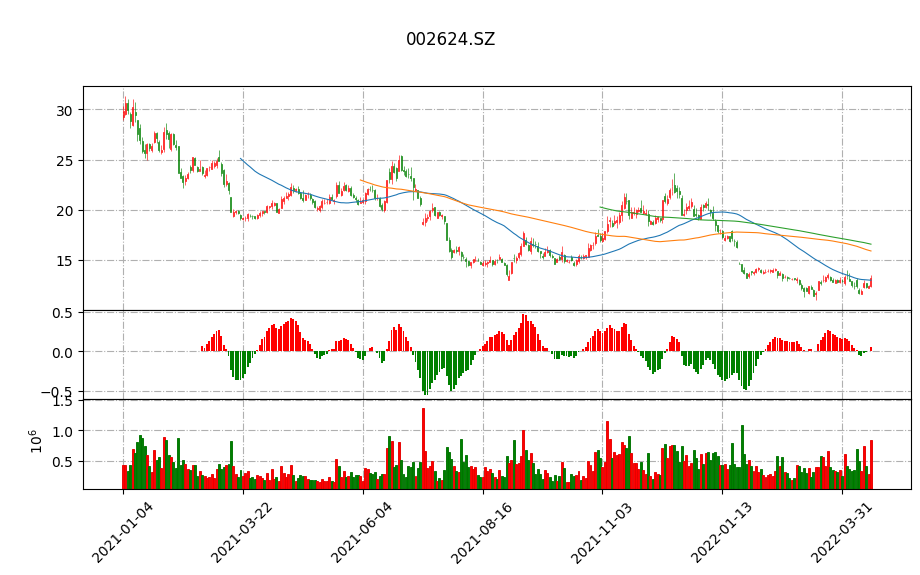

In [4]:
mycolor = mpf.make_marketcolors(up='red',down='green',inherit=True)
mystyle = mpf.make_mpf_style(gridaxis='both',gridstyle='-.',y_on_right=False,marketcolors=mycolor)
data["macd"], data["macd_signal"], data["macd_hist"] = ta.MACD(data['close'])


colors = ['r' if v >= 0 else 'g' for v in data["macd_hist"]]
macd_hist_plot = mpf.make_addplot(data["macd_hist"], type='bar', panel=1, color=colors) 
plots = [ macd_hist_plot]


mpf.plot(data, 
         type='candle',
         datetime_format='%Y-%m-%d',
         figratio=(20,10), 
         style=mystyle, 
         mav=(50,100,200), 
         addplot=plots, 
         title=f"\n002624.SZ", 
         volume=True, 
         volume_panel=2,
         ylabel='', 
         ylabel_lower=''
)


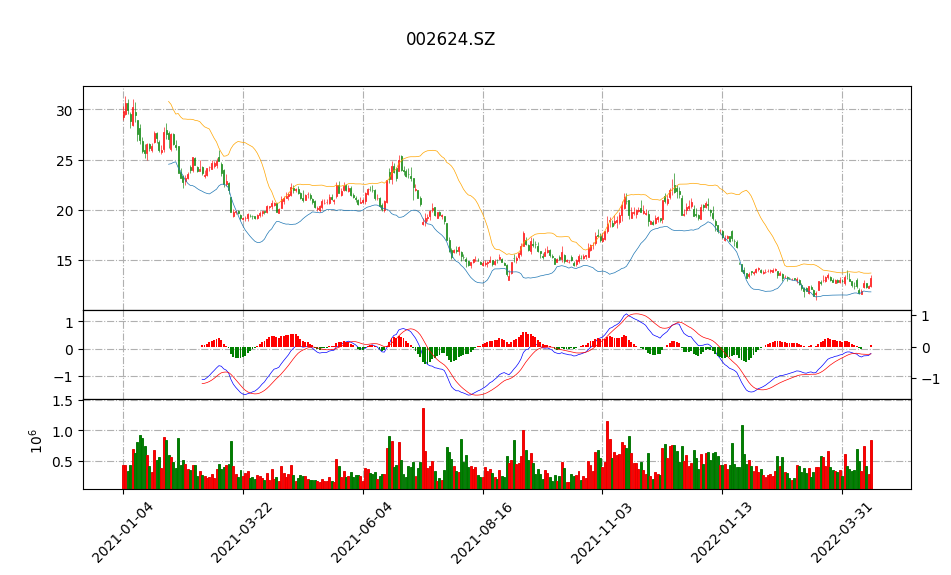

In [5]:
data['upper'], data['BOLL'], data['lower'] = ta.BBANDS(data.close,timeperiod=20,nbdevup=2,nbdevdn=2,matype=0)

colors = ['r' if v >= 0 else 'g' for v in data["macd_hist"]]
macd_plot = mpf.make_addplot(data["macd"], panel=1,width=0.5,color='b')
macd_hist_plot = mpf.make_addplot(data["macd_hist"], type='bar', panel=1, color=colors) # color='dimgray'
macd_signal_plot = mpf.make_addplot(data["macd_signal"],color='r', panel=1,width=0.5)

upper_plot= mpf.make_addplot(data["upper"],color='orange', panel=0,width=0.5)
lower_plot= mpf.make_addplot(data["lower"], panel=0,width=0.5)

plots = [macd_plot,macd_hist_plot,macd_signal_plot,upper_plot,lower_plot]

mpf.plot(data, 
         type='candle',
         datetime_format='%Y-%m-%d',
         figratio=(20,10), 
         style=mystyle, 
         addplot=plots, 
         title=f"\n002624.SZ", 
         volume=True, 
         volume_panel=2,
         ylabel='', 
         ylabel_lower=''
)


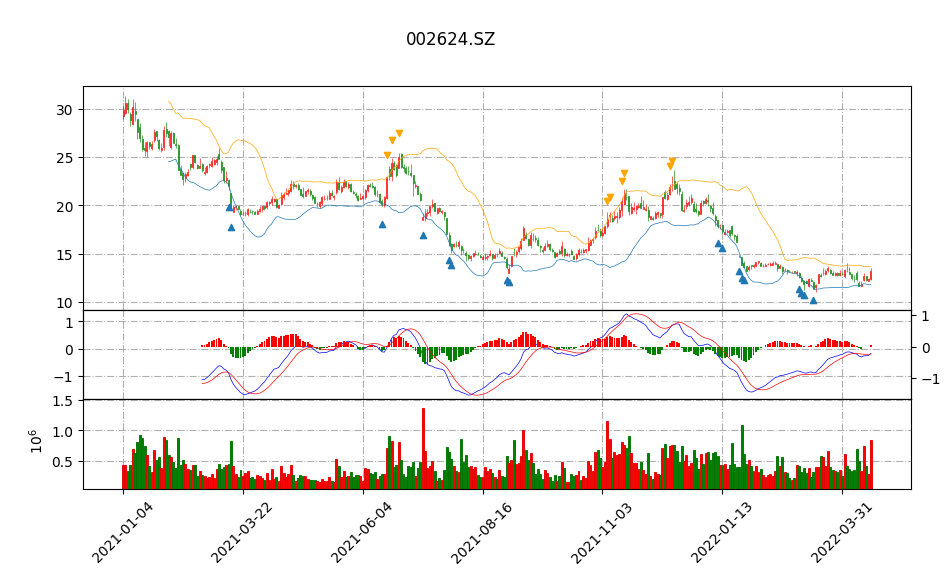

In [22]:
import numpy as np

data['rolling_max']=data['close'].rolling(40).max()
data['rolling_min']=data['close'].rolling(40).min()

data['high_signal']=data.apply(lambda x: x['close']*1.1 if x['close']>x['upper']  and x['close']==x['rolling_max'] else np.nan, axis = 1)
data['low_signal']=data.apply(lambda x: x['close']*0.9 if x['close']<x['lower'] and x['close']==x['rolling_min']  else np.nan, axis = 1)

high_signal_plot=mpf.make_addplot(data['high_signal'],type='scatter',markersize=20,marker='v',color='orange')
low_signal_plot=mpf.make_addplot(data['low_signal'],type='scatter',markersize=20,marker='^')

plots = [macd_plot,macd_hist_plot,macd_signal_plot,upper_plot,lower_plot,high_signal_plot,low_signal_plot]

mpf.plot(data, 
         type='candle',
         datetime_format='%Y-%m-%d',
         figratio=(20,10), 
         style=mystyle, 
         addplot=plots, 
         title=f"\n002624.SZ", 
         volume=True, 
         volume_panel=2,
         ylabel='', 
         ylabel_lower=''
        )


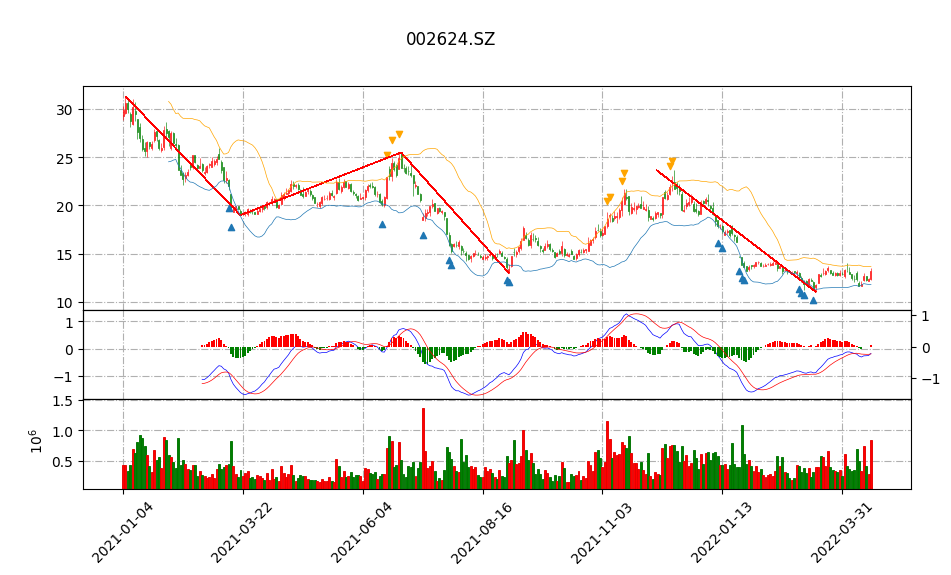

In [23]:
seq_of_seq_of_points=[
    [('2021-01-05',31.32),('2021-03-19',19)],
    [('2021-03-19',19),('2021-06-29',25.5),('2021-08-31',13)],
    [('2021-12-05',23.67),('2022-03-16',11.05)]
]
    
mpf.plot(data, 
         type='candle',
         datetime_format='%Y-%m-%d',
         figratio=(20,10), 
         style=mystyle, 
         addplot=plots, 
         title=f"\n002624.SZ", 
         volume=True, 
         volume_panel=2,
         alines=dict(alines=seq_of_seq_of_points,colors=['r'],linewidths=0.5),
         ylabel='', 
         ylabel_lower=''
        )
